<a href="https://colab.research.google.com/github/saivaruntejamudumba/Python-Scripts/blob/master/Emotional_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://raw.githubusercontent.com/wshuyi/info-5731-public/master/demo-emotional-analysis.txt

--2019-02-26 23:10:14--  https://raw.githubusercontent.com/wshuyi/info-5731-public/master/demo-emotional-analysis.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41933 (41K) [text/plain]
Saving to: ‘demo-emotional-analysis.txt.2’

demo-emotional-anal 100%[===================>]  40.95K  --.-KB/s    in 0.01s   

2019-02-26 23:10:14 (2.85 MB/s) - ‘demo-emotional-analysis.txt.2’ saved [41933/41933]



In [0]:
with open("demo-emotional-analysis.txt") as f:
  data=f.read()

In [0]:
data[:1000]

"[First scene shows the location of Casterly Rock (ancestral seat of House Lannister) on a giant map of Westeros. There are several game pieces representing different House sigils located on different parts of the map. ROBB STARK and CATELYN STARK are at a campsite, within a tent lit up by candles]\n\nCATELYN: Are you sure about this?\n\nROBB: No.\n\nCATELYN: It's dangerous.\n\n[ROBB nods in agreement]\n\nROBB: If we take Tywin's castle from him, the lords of Westeros will realize he's not invincible. Take his home, take his gold, take his power.\n\nCATELYN: Why are you telling me?\n\n[ROBB pauses then walks around CATELYN]\n\nROBB: You begged me not to send Theon to negotiate with his father and I ignored your advice.\n\n[ROBB pours himself something to drink]\n\nROBB: Now Winterfell is burned to the ground. The North is overrun with Ironborn and Bran and Rickon are gone.\n\n[ROBB pauses]\n\n\nROBB: So, Casterly Rock? I'm asking your advice.\n\n[CATELYN pauses, staring at ROBB. She th

In [0]:
text=data.split('\n\n')

In [0]:
text[:10]

['[First scene shows the location of Casterly Rock (ancestral seat of House Lannister) on a giant map of Westeros. There are several game pieces representing different House sigils located on different parts of the map. ROBB STARK and CATELYN STARK are at a campsite, within a tent lit up by candles]',
 'CATELYN: Are you sure about this?',
 'ROBB: No.',
 "CATELYN: It's dangerous.",
 '[ROBB nods in agreement]',
 "ROBB: If we take Tywin's castle from him, the lords of Westeros will realize he's not invincible. Take his home, take his gold, take his power.",
 'CATELYN: Why are you telling me?',
 '[ROBB pauses then walks around CATELYN]',
 'ROBB: You begged me not to send Theon to negotiate with his father and I ignored your advice.',
 '[ROBB pours himself something to drink]']

In [0]:
len(text)

490

In [0]:
import spacy 

In [0]:
nlp=spacy.load('en')

In [0]:
def tokenize(sent):
  doc= nlp.tokenizer(sent)
  return [token.lower_ for token in doc if not token.is_punct]

In [0]:
newtext=[]
for line in text:
  token_list = tokenize(line)
  if token_list:
    newtext.append(token_list)

In [0]:
newtext

[['first',
  'scene',
  'shows',
  'the',
  'location',
  'of',
  'casterly',
  'rock',
  'ancestral',
  'seat',
  'of',
  'house',
  'lannister',
  'on',
  'a',
  'giant',
  'map',
  'of',
  'westeros',
  'there',
  'are',
  'several',
  'game',
  'pieces',
  'representing',
  'different',
  'house',
  'sigils',
  'located',
  'on',
  'different',
  'parts',
  'of',
  'the',
  'map',
  'robb',
  'stark',
  'and',
  'catelyn',
  'stark',
  'are',
  'at',
  'a',
  'campsite',
  'within',
  'a',
  'tent',
  'lit',
  'up',
  'by',
  'candles'],
 ['catelyn', 'are', 'you', 'sure', 'about', 'this'],
 ['robb', 'no'],
 ['catelyn', 'it', "'s", 'dangerous'],
 ['robb', 'nods', 'in', 'agreement'],
 ['robb',
  'if',
  'we',
  'take',
  'tywin',
  "'s",
  'castle',
  'from',
  'him',
  'the',
  'lords',
  'of',
  'westeros',
  'will',
  'realize',
  'he',
  "'s",
  'not',
  'invincible',
  'take',
  'his',
  'home',
  'take',
  'his',
  'gold',
  'take',
  'his',
  'power'],
 ['catelyn', 'why', 'are

In [0]:
import pandas as pd

In [0]:
df=pd.DataFrame(newtext)

In [0]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,first,scene,shows,the,location,of,casterly,rock,ancestral,seat,...,None,None,None,None,None,None,None,None,None,None
1,catelyn,are,you,sure,about,this,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,robb,no,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,catelyn,it,'s,dangerous,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,robb,nods,in,agreement,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [0]:
df= df.stack().reset_index(level=0)

In [0]:
df.columns=['line','word']

In [0]:
df.head()

,line,word
0,0,first
1,0,scene
2,0,shows
3,0,the
4,0,location


In [0]:
df.tail()

,line,word
2,476,black
0,477,end
1,477,credits
2,477,no
3,477,music


In [0]:
df.reset_index(drop=True, inplace=True)

In [0]:
df.head()

,line,word
0,0,first
1,0,scene
2,0,shows
3,0,the
4,0,location


In [0]:
df.tail(10)

,line,word
7516,475,from
7517,475,her
7518,475,neck
7519,476,cut
7520,476,to
7521,476,black
7522,477,end
7523,477,credits
7524,477,no
7525,477,music


In [0]:
!wget https://github.com/wshuyi/info-5731-public/raw/master/NRC_emotion_lexicon_list.txt

--2019-02-26 23:10:29--  https://github.com/wshuyi/info-5731-public/raw/master/NRC_emotion_lexicon_list.txt
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wshuyi/info-5731-public/master/NRC_emotion_lexicon_list.txt [following]
--2019-02-26 23:10:29--  https://raw.githubusercontent.com/wshuyi/info-5731-public/master/NRC_emotion_lexicon_list.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2579144 (2.5M) [text/plain]
Saving to: ‘NRC_emotion_lexicon_list.txt.2’

NRC_emotion_lexicon 100%[===================>]   2.46M  --.-KB/s    in 0.06s   

2019-02-26 23:10:29 (44.2 MB/s) - ‘NRC

In [0]:
nrc=pd.read_csv('NRC_emotion_lexicon_list.txt',sep="\t",header=None)


In [0]:
nrc.columns=['word','emotion','values']

In [0]:
nrc.head()

,word,emotion,values
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [0]:
nrc = nrc.pivot(index='word', columns='emotion', values='values')

In [0]:
nrc

emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
word,,,,,,,,,,
NaN,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,1
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0
abandonment,1,0,0,1,0,1,0,1,1,0
abate,0,0,0,0,0,0,0,0,0,0
abatement,0,0,0,0,0,0,0,0,0,0
abba,0,0,0,0,0,0,1,0,0,0


In [0]:
joined=[df,nrc]

In [0]:
joined.head()

AttributeError: ignored

In [0]:
x=pd.concat(joined)

In [0]:
res=df.join(nrc,how='left',on='word')

In [0]:
res.tail()

,line,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
7521,476,black,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7522,477,end,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7523,477,credits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7524,477,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7525,477,music,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [0]:
res.fillna(0,inplace=True)

In [0]:
res.tail()

,line,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
7521,476,black,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7522,477,end,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7523,477,credits,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7524,477,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7525,477,music,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [0]:
res=res.groupby('line').sum()

In [0]:
res.head()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
line,,,,,,,,,,
0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba5c075898>,
      dtype=object)

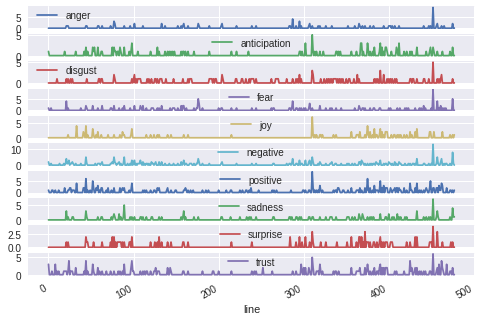

In [0]:
res.plot(subplots=True)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: ignored

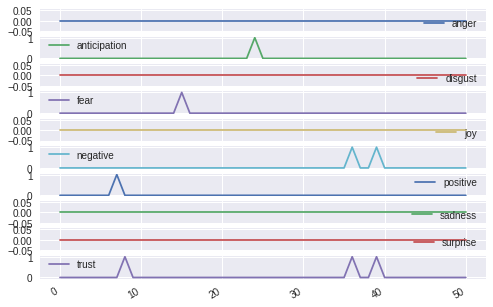

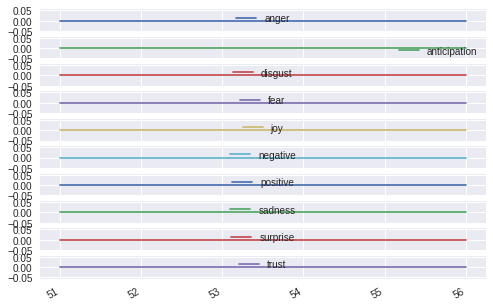

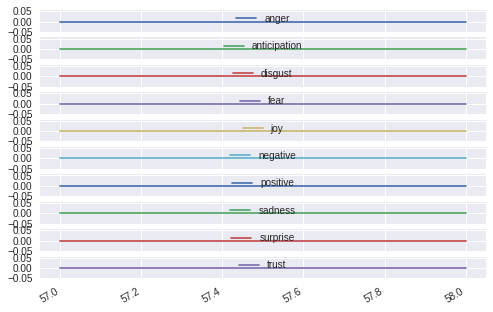

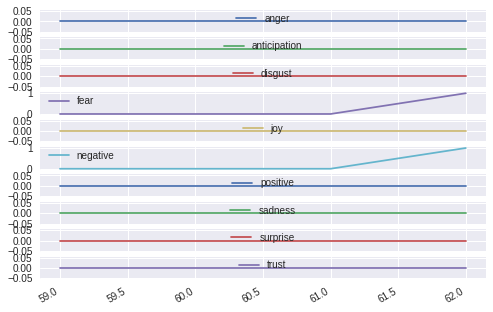

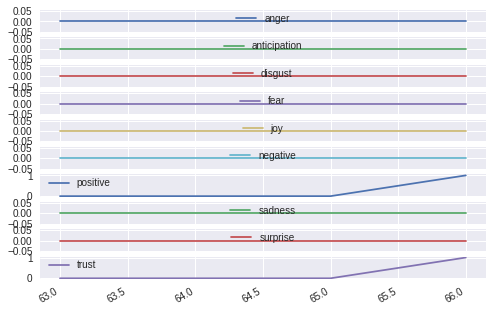

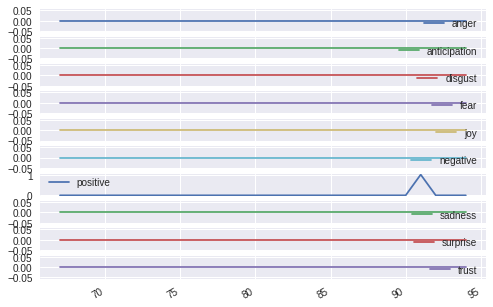

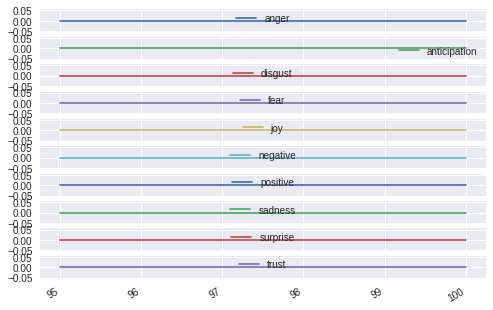

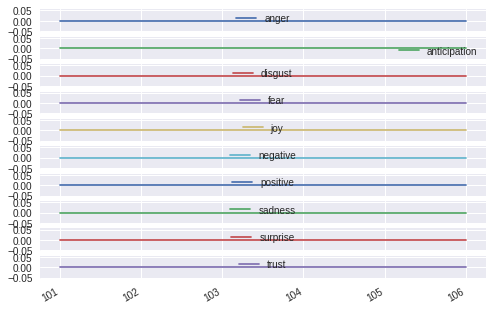

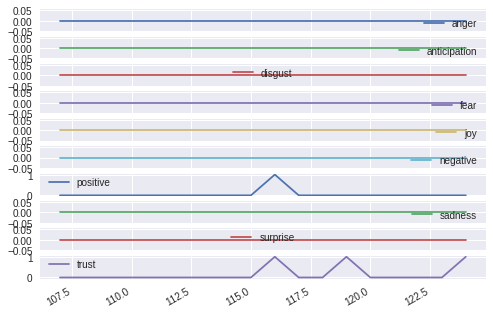

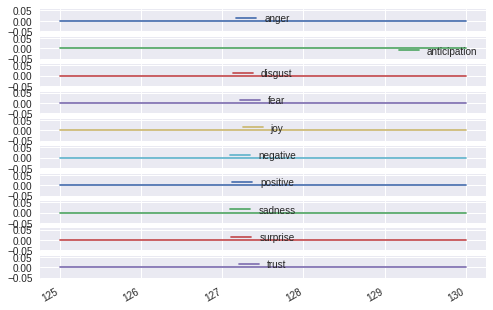

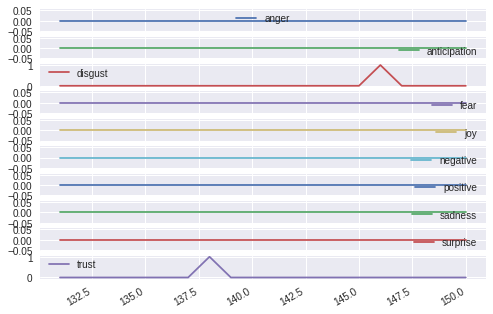

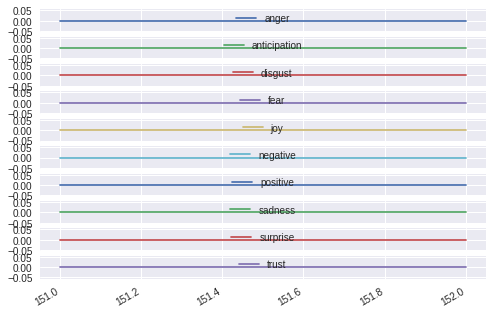

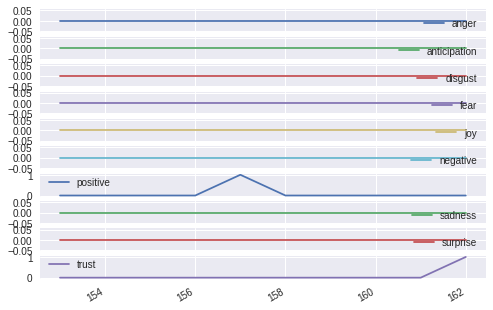

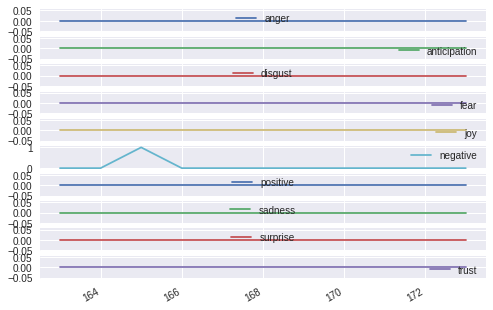

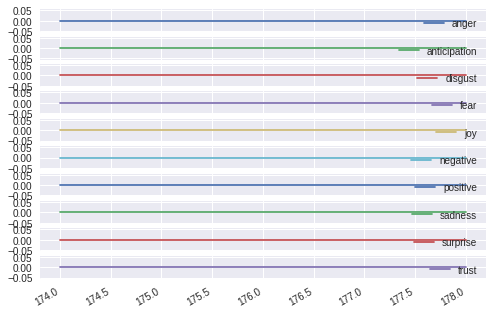

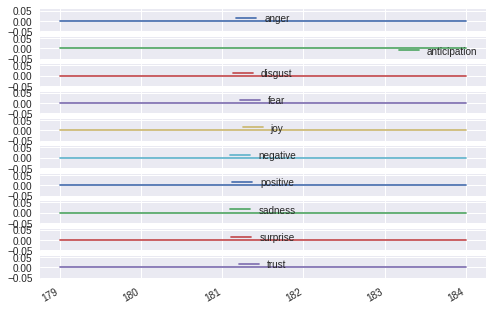

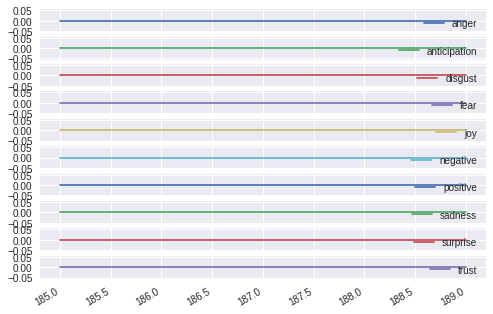

In [0]:
res.plot()

In [0]:
res.plot()